In [37]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [38]:
data=pd.read_csv("mydata.csv",na_values="?")


process.b1.capacity = Capacity (max number of products to win) of Bidder 1.
process.b2.capacity = Capacity (max number of products to win) of Bidder 2.
process.b3.capacity = Capacity (max number of products to win) of Bidder 3.
process.b4.capacity = Capacity (max number of products to win) of Bidder 4.
property.price      = Price currently verified.
property.product    = Product currently verified.
property.winner     = Bidder currently verified as winner of the product (0 if only price verified).
verification.result = Binary verification result - is the verified outcome possible?
verification.time   = Runtime of verification procedure.


Performing Data Preprocessing

In [40]:
print(data)

      process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                       0                    0                    2   
1                       0                    0                    2   
2                       0                    0                    2   
3                       0                    0                    2   
4                       0                    0                    2   
...                   ...                  ...                  ...   
2038                    2                    3                    2   
2039                    2                    3                    2   
2040                    2                    3                    2   
2041                    2                    3                    2   
2042                    2                    3                    2   

      process.b4.capacity  property.price  property.product  property.winner  \
0                       1              59                 1        

In [41]:
#Rename columns Name
df=pd.DataFrame(data)
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [42]:
#printing unique values in each Attribute (features)
for i in df.columns:
    print(df[i].unique())

[0 1 2]
[0 1 2 3]
[2 1]
[1 0]
[59 60 69 70 61 62 63 64 65 66 67 68 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90]
[1 2 4 6 3 5]
[0 3 4 2 1]
[False  True]
[ 163.31666667  200.86        154.88888889 ... 9365.45       8474.025
   82.00833333]


In [43]:
#Print Information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB
None


In [44]:
#Change Categorical data into numerical Data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['verification.result']=le.fit_transform(df['verification.result'])
df['verification.result'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   int64  
 8   verification.time    2043 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 143.8 KB


In [45]:
#data after coonverting categorical data into numerical data of target column "Verification result"
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,0,163.316667
1,0,0,2,1,59,2,0,0,200.860000
2,0,0,2,1,59,4,0,0,154.888889
3,0,0,2,1,59,6,0,0,108.640000
4,0,0,2,1,60,1,0,1,85.466667


In [46]:
#Performing EDA

In [12]:
df.shape

(2043, 9)

<AxesSubplot:>

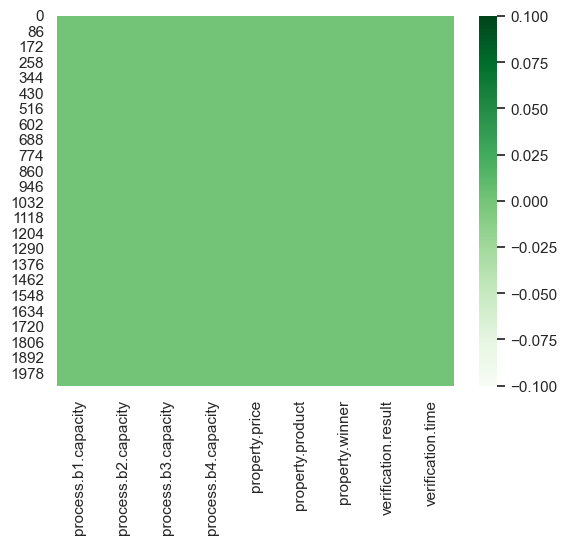

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
#visualizing missing values
sns.heatmap(df.isnull(),cbar=True,cmap='Greens') 
# as there is no missing values. SO, this is the heatmap

<AxesSubplot:>

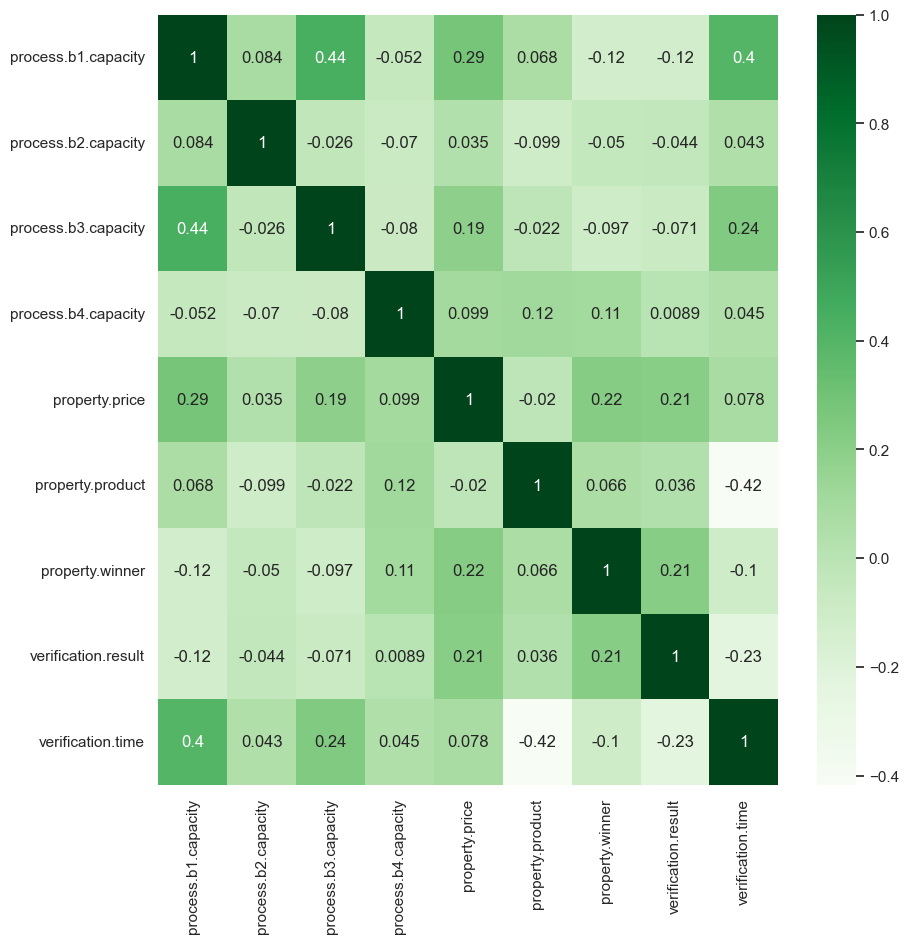

In [49]:
#Data Visualization using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greens')

In [50]:
#Now analyzing how feature variables affect the target variable

In [51]:
#positive related & Negative related attributes

<AxesSubplot:xlabel='property.price', ylabel='Count'>

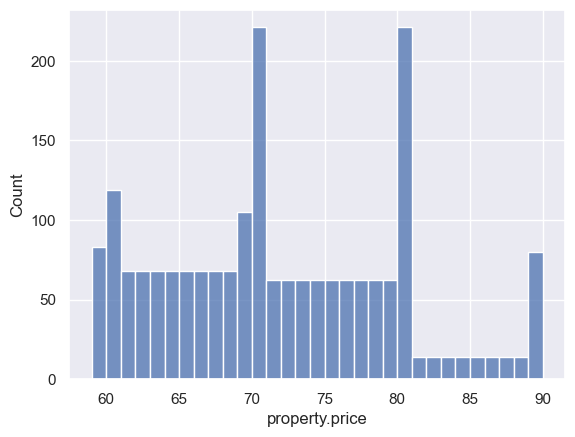

In [52]:
sns.histplot(df['property.price'] ,bins=31) #32 unique values in attribute 

<AxesSubplot:xlabel='property.product', ylabel='Count'>

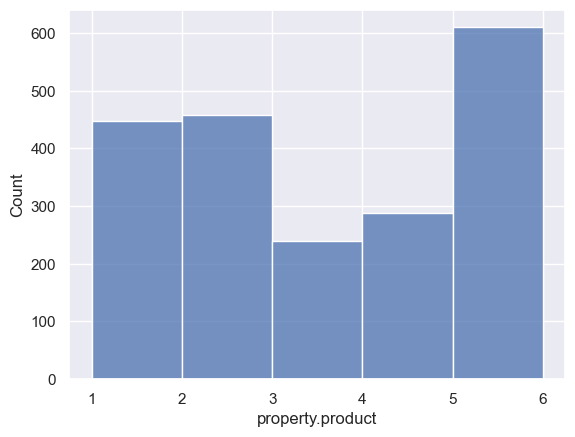

In [53]:
sns.histplot(df['property.product'] ,bins=5)

<AxesSubplot:xlabel='property.winner', ylabel='Count'>

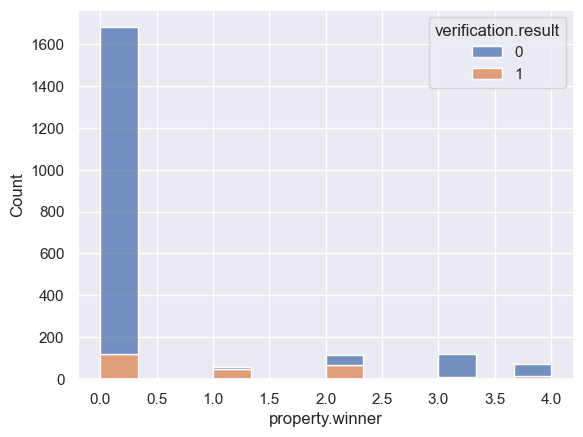

In [55]:
sns.histplot(data=df, x="property.winner", hue="verification.result", multiple="stack")

In [57]:
# Training the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns=['verification.result','verification.time']),
                                           df['verification.result'],test_size=0.3)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1430, 7) (613, 7) (1430,) (613,)


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
# Perceptron Model
from sklearn.linear_model import Perceptron
model_pt = Perceptron(fit_intercept=True,shuffle=True,eta0=2,n_iter_no_change=6)
model_pt.fit(xtrain, ytrain)


Perceptron(eta0=2, n_iter_no_change=6)

In [60]:
# Training and testing accuracy of Model
print("Training accuracy is : " , accuracy_score(model_pt.predict(xtrain),ytrain))
print("Testing accuracy is : " , accuracy_score(model_pt.predict(xtest),ytest))

Training accuracy is :  0.8657342657342657
Testing accuracy is :  0.8858075040783034


In [61]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=80)
model_tree.fit(xtrain, ytrain)
#After performing hyperparameter tuning

DecisionTreeClassifier(criterion='entropy', max_depth=80)

In [62]:
# Training and testing accuracy of Decision Tree Model
print("Training accuracy is : " , accuracy_score(model_tree.predict(xtrain),ytrain))
print("Testing accuracy is : " , accuracy_score(model_tree.predict(xtest),ytest))
# training accuracy is 1.0 and testing accuracy is .99 for gini 

Training accuracy is :  1.0
Testing accuracy is :  0.9836867862969005


In [63]:
# Support Vector Machine Model
from sklearn.svm import SVC
model_svm=SVC(C=1.0, kernel='poly', degree=5, tol=0.002, verbose=False, max_iter=-1,
              decision_function_shape='ovr', random_state=None)
model_svm.fit(xtrain, ytrain)

SVC(degree=5, kernel='poly', tol=0.002)

In [64]:
# Training and testing accuracy of SVM Model
print("Training accuracy is : " , accuracy_score(model_svm.predict(xtrain),ytrain))
print("Testing accuracy is : " , accuracy_score(model_svm.predict(xtest),ytest))

Training accuracy is :  0.8657342657342657
Testing accuracy is :  0.8858075040783034


In [65]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model_nb= GaussianNB()
model_nb.fit(xtrain, ytrain)

GaussianNB()

In [66]:
# Training and testing accuracy of Naive Bayes Model
print("Training accuracy is : " , accuracy_score(model_nb.predict(xtrain),ytrain))
print("Testing accuracy is : " , accuracy_score(model_nb.predict(xtest),ytest))

Training accuracy is :  0.8272727272727273
Testing accuracy is :  0.8205546492659054


In [67]:
#Hyperparameter tuning

In [68]:
# Train Test Split for hyperparameter tuning
# Specifying features and target
X = df.drop(['verification.result','verification.time'],axis=1) #Target attributes are dropped. 
Y = df['verification.result']  # Role of the attribute is Target.
# Splitting the data into train and test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3, random_state=30)

In [70]:
#Manual Search
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 30}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 50}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}

# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)

# fitting the data into model
model_1.fit(Xtrain, Ytrain)
model_2.fit(Xtrain, Ytrain)
model_3.fit(Xtrain, Ytrain)
model_4.fit(Xtrain, Ytrain)
model_5.fit(Xtrain, Ytrain)

# Prediction sets
preds_1 = model_1.predict(Xtest)
preds_2 = model_2.predict(Xtest)
preds_3 = model_3.predict(Xtest)
preds_4 = model_4.predict(Xtest)
preds_5 = model_5.predict(Xtest)
# printing the accuracy of each models
print(f'Accuracy on Model 1: {round(accuracy_score(Ytest, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(Ytest, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(Ytest, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(Ytest, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(Ytest, preds_5), 3)}')

Accuracy on Model 1: 0.995
Accuracy on Model 2: 0.997
Accuracy on Model 3: 0.997
Accuracy on Model 4: 0.995
Accuracy on Model 5: 0.992


In [71]:
##Hyperparameter tuning 
#Grid Search
#Importing the Libraries & the Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#import warnings and put 
import warnings
warnings.filterwarnings('ignore')

#Building Random Forest Classifier
rfc = RandomForestClassifier()

#Initializing GridSearchCV() object and fitting it with hyperparameters
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,8))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(Xtrain, Ytrain)

#Getting the Best Hyperparameters
print(clf.best_params_)

#Getting the Best accuracy score
print(clf.best_score_)

{'max_depth': 11, 'max_features': 5}
0.9937062937062937


In [ ]:
#Conclusions
'''
From performing pre-processing operations on the dataset and after applying train test split on the dataset,
four classification models that are Perceptron, Decision tree classifier, Support vector machine and Naïve bayes 
are applied.
The accuracies of each model is observed and we can conclude that Decision Tree Classifier gives the best accuracy, 98%.

While performing hyperparameter tuning, two searches are used, Manual search and Grid Search CV(Cross validation). 
After facing some disadvantages of manual search, like, large code, manual attributes allocation, etc. ,Grid search is used.

For performing manual search, Decision tree classifier is used and all the 5 models gave different accuracies. 
The best accuracy is 99.7% . 
While for Grid search, Random forest classifier is used. 
The best accuracy is 99.3% , and max_depth is 11 and max_features is 5.

So, after performing the hyperparameter tuning, Decision tree classifier and 
Random forest classifier is best suited model for Spectrum Auction verification Process.

'''